# Machine Learning Review Exercise 3 (ML_SP22_RE_3) on EDA

### Due Date: 3/7/2022 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***The goal of this review excercise is to practice Explorary Data Analysis similar to what we had shown in class***

***in particular***

* Check if there are any missing values
* Handle missing values by dropping the rows or fill in missing values by imputation
* Check for outliers and remove them (if needed)
* Compute simple statistics on single variables
* Basic Plots (pairplots, boxplots etc)
* Investigate Categorial Variables
* Facet Grid
* Build simple linear regression model

In [2]:
df = pd.read_csv(r"C:\Users\redwa\Downloads\Salaries2.csv")
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [3]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
398,Prof,A,33.0,30.0,Male,103106
399,Prof,A,31.0,19.0,Male,150564
400,Prof,A,42.0,25.0,Male,101738
401,Prof,A,25.0,15.0,Male,95329
402,AsstProf,A,8.0,4.0,Male,81035


In [4]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [5]:
df.shape

(403, 6)

### Check Missing Data

In [6]:
df.isnull().any()

Rank            False
Discipline      False
YrsSincePhd      True
YrsOfService     True
Sex              True
Salary          False
dtype: bool

In [7]:
bad_data = df [ np.isnan(df.YrsSincePhd) ]
bad_data2 = df [ np.isnan(df.YrsOfService) ]
bad_data3 = df [ pd.isna(df.Sex) ]

In [8]:
bad_data.shape
bad_data2.shape
bad_data3.shape

(2, 6)

In [9]:
bad_data

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
317,Prof,A,NaN,9.0,Male,108100


In [10]:
bad_data2

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
88,Prof,B,37.0,NaN,Male,152708


In [11]:
bad_data3

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
64,AssocProf,B,11.0,11.0,NaN,103613
100,AssocProf,B,17.0,12.0,NaN,96000


### Remove missing data rows

In [12]:
df = df[ ~np.isnan(df.YrsSincePhd)]

In [13]:
df.isnull().any()

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService     True
Sex              True
Salary          False
dtype: bool

In [14]:
df = df[ ~np.isnan(df.YrsOfService)]

In [15]:
df.isnull().any()

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex              True
Salary          False
dtype: bool

In [16]:
df = df[ ~pd.isna(df.Sex)]

In [17]:
df.isnull().any()

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool

### check and remove outliers

<AxesSubplot:xlabel='YrsSincePhd', ylabel='YrsOfService'>

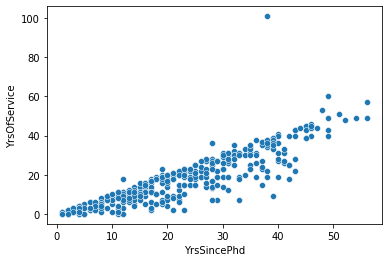

In [18]:
sns.scatterplot(x='YrsSincePhd', y = 'YrsOfService', data=df)

<AxesSubplot:xlabel='YrsSincePhd', ylabel='YrsOfService'>

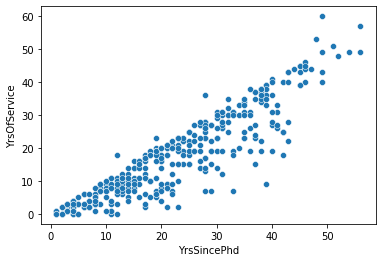

In [19]:
df = df[ df['YrsOfService'] <= 80]
sns.scatterplot(x='YrsSincePhd', y = 'YrsOfService', data=df)

<AxesSubplot:xlabel='YrsSincePhd', ylabel='Salary'>

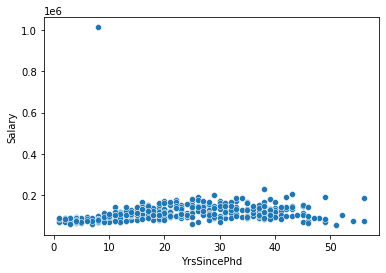

In [39]:
sns.scatterplot(x='YrsSincePhd', y = 'Salary', data=df)

<AxesSubplot:xlabel='YrsSincePhd', ylabel='Salary'>

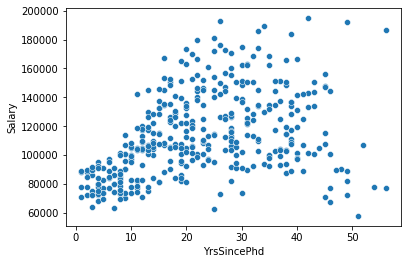

In [41]:
df = df[ df['Salary'] <= 300000]
sns.scatterplot(x='YrsSincePhd', y = 'Salary', data=df)

### simple Statistics on a Single Variate

In [42]:
var = 'Salary'
series = df[var]
type(series)

pandas.core.series.Series

In [43]:
print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 112894.7614213198
Stdev: 29039.788158560663
Min: 57800
Max: 194800
Median: 107175.0
Mode: 0    92000
dtype: int64
Skew: 0.5673336848241458
Kurtosis: -0.3094443832553506


### Simple plots using Seaborn

<AxesSubplot:xlabel='Salary', ylabel='Density'>

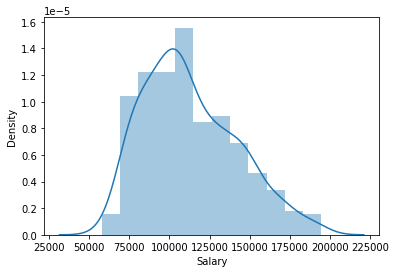

In [44]:
sns.distplot(series)

<AxesSubplot:xlabel='YrsOfService', ylabel='Density'>

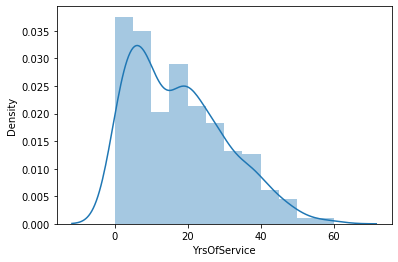

In [45]:
sns.distplot(df['YrsOfService'])

<AxesSubplot:xlabel='Rank', ylabel='Salary'>

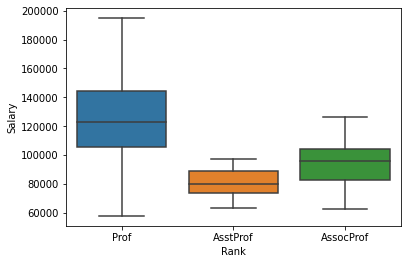

In [46]:
sns.boxplot(x='Rank', y = 'Salary', data=df)

### pair plot

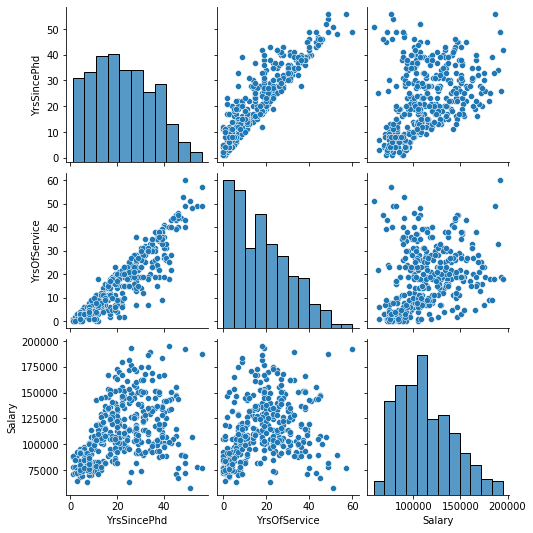

In [47]:
sns.pairplot(data=df)

### calculate Correlation, find out which variables have the highest correlation with Salary

In [26]:
df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909512,0.185126
YrsOfService,0.909512,1.000000,0.147007
Salary,0.185126,0.147007,1.000000


### Now focus on the relationship between that variable and Salary. Do a scatter if needed

<AxesSubplot:xlabel='YrsSincePhd', ylabel='Salary'>

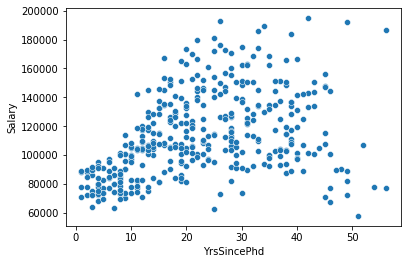

In [51]:
sns.scatterplot(x='YrsSincePhd', y = 'Salary', data = df)

### Fit a linear Regression model 

<AxesSubplot:>

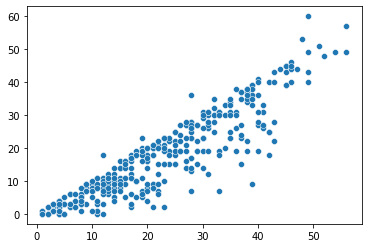

In [52]:
# Extract a numpy array from the dataframe
X = df['YrsSincePhd'].values
Y = df['YrsOfService'].values
sns.scatterplot(x=X, y=Y)

In [53]:
# create a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
# Need a 2D numpy array, so call reshape(-1, 1)
X = df['YrsSincePhd'].values.reshape(-1,1)
Y = df['YrsOfService'].values.reshape(-1,1)

In [55]:
# Fit the model
model.fit(X, Y)

LinearRegression()

In [56]:
# now make the prediction
Y_pred = model.predict(X)

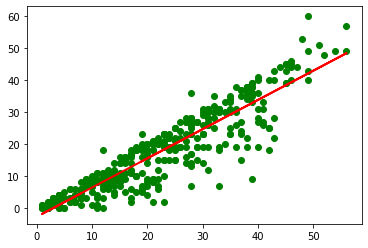

In [62]:
plt.scatter(X, Y,  color='green')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [63]:
print(model.intercept_)
print(model.coef_)

[-2.7913356]
[[0.91460825]]


## Now investigate how the categorical variables affect the Salary

In [65]:
df['Rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [66]:
df['Rank'].value_counts()

Prof         263
AsstProf      67
AssocProf     64
Name: Rank, dtype: int64

In [75]:
df.groupby(['Rank'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Rank,,,,,,,,
AssocProf,64.0,93876.437500,13831.699844,62884.0,82475.0,95626.5,104226.25,126431.0
AsstProf,67.0,80775.985075,8174.112637,63100.0,74000.0,79800.0,88597.50,97032.0
Prof,263.0,125705.144487,26176.958560,57800.0,105779.0,122875.0,144645.50,194800.0


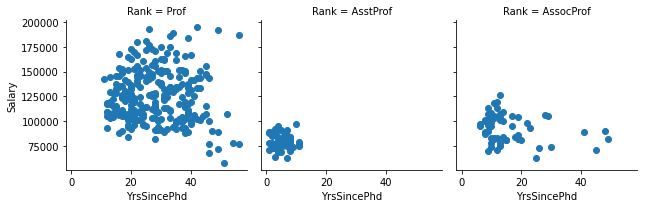

In [68]:
g = sns.FacetGrid(df, col = 'Rank')
g = (g.map(plt.scatter, "YrsSincePhd", "Salary").add_legend())

In [70]:
df['Sex'].value_counts()

Male      355
Female     39
Name: Sex, dtype: int64

In [76]:
df.groupby(['Sex'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,39.0,101002.410256,25952.127317,62884.0,77250.0,103750.0,117002.5,161101.0
Male,355.0,114201.245070,29096.829424,57800.0,92000.0,107550.0,134620.0,194800.0


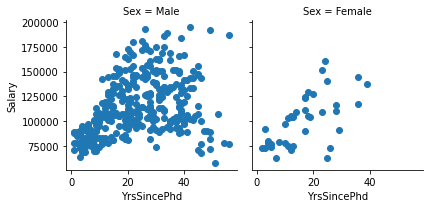

In [69]:
g = sns.FacetGrid(df, col = 'Sex')
g = (g.map(plt.scatter, "YrsSincePhd", "Salary").add_legend())

# FacetGrid

<AxesSubplot:>

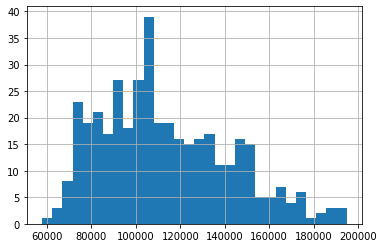

In [71]:
df['Salary'].hist(bins=30)

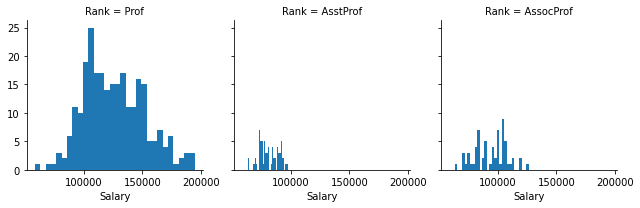

In [74]:
g = sns.FacetGrid(df, col = 'Rank')
g = g.map(plt.hist, 'Salary', bins=30)

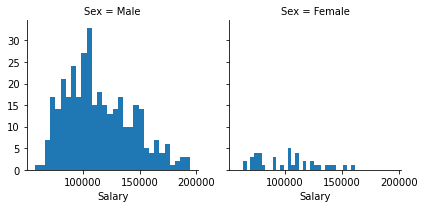

In [77]:
g = sns.FacetGrid(df, col = 'Sex')
g = g.map(plt.hist, 'Salary', bins=30)